Loading dataset...
Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


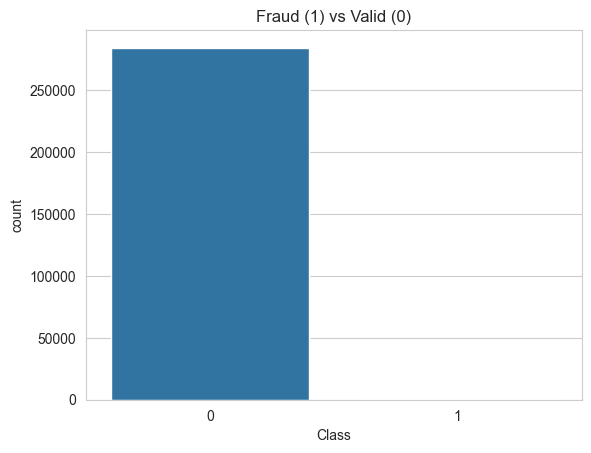

Train size: (199364, 30) Test size: (85443, 30)

=== Baseline Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     85295
           1     0.8585    0.6149    0.7165       148

    accuracy                         0.9992     85443
   macro avg     0.9289    0.8073    0.8581     85443
weighted avg     0.9991    0.9992    0.9991     85443

ROC AUC: 0.9559805159517921


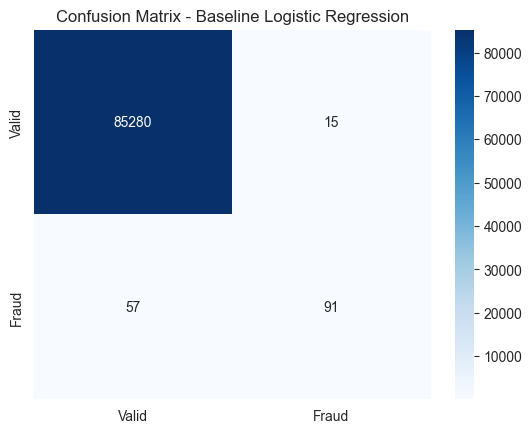


Before SMOTE: [199020    344]
After SMOTE : [199020 199020]

=== Logistic Regression + SMOTE ===
              precision    recall  f1-score   support

           0     0.9998    0.9775    0.9885     85295
           1     0.0634    0.8784    0.1183       148

    accuracy                         0.9773     85443
   macro avg     0.5316    0.9279    0.5534     85443
weighted avg     0.9982    0.9773    0.9870     85443

ROC AUC: 0.9659891030018235

=== Random Forest + SMOTE ===
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.8582    0.7770    0.8156       148

    accuracy                         0.9994     85443
   macro avg     0.9289    0.8884    0.9076     85443
weighted avg     0.9994    0.9994    0.9994     85443

ROC AUC: 0.9643286891440359
Final Random Forest model saved to ../models/final_rf.joblib


In [1]:
# ========================
# Credit Card Fraud Detection
# Tasks C-1 to C-6
# ========================

# --- 1. Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Sthepa 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib

sns.set_style("whitegrid")

# --- 2. Load Data ---
print("Loading dataset...")
df = pd.read_csv("../data/creditcard.csv")
print("Dataset shape:", df.shape)
display(df.head())

# --- 3. Exploratory Data Analysis (C-1) ---
print("\nDataset info:")
df.info()

print("\nMissing values per column:\n", df.isna().sum().sum())
print("Duplicates:", df.duplicated().sum())

fraud = df[df["Class"] == 1]
valid = df[df["Class"] == 0]
print("Fraud cases:", len(fraud))
print("Valid cases:", len(valid))
print("Fraud proportion: {:.4f}%".format(len(fraud)/len(df)*100))

sns.countplot(x="Class", data=df)
plt.title("Fraud (1) vs Valid (0)")
plt.show()

# --- 4. Preprocessing ---
# Scale Amount and (optionally) Time
scaler = StandardScaler()
df["Amount_scaled"] = scaler.fit_transform(df[["Amount"]])
if "Time" in df.columns:
    df["Time_scaled"] = scaler.fit_transform(df[["Time"]])

# Features and target
features = [c for c in df.columns if c not in ["Class", "Amount", "Time"]]
X = df[features]
y = df["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

# --- 5. Baseline Model: Logistic Regression (C-2) ---
baseline_lr = LogisticRegression(max_iter=2000)
baseline_lr.fit(X_train, y_train)

y_pred = baseline_lr.predict(X_test)
y_prob = baseline_lr.predict_proba(X_test)[:,1]

print("\n=== Baseline Logistic Regression ===")
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Valid","Fraud"], yticklabels=["Valid","Fraud"])
plt.title("Confusion Matrix - Baseline Logistic Regression")
plt.show()

# --- 6. Handle Imbalance with SMOTE (C-3) ---
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("\nBefore SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_train_sm))

lr_sm = LogisticRegression(max_iter=2000)
lr_sm.fit(X_train_sm, y_train_sm)

y_pred_sm = lr_sm.predict(X_test)
y_prob_sm = lr_sm.predict_proba(X_test)[:,1]

print("\n=== Logistic Regression + SMOTE ===")
print(classification_report(y_test, y_pred_sm, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_prob_sm))

# --- 7. Advanced Model: Random Forest (C-4) ---
rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train_sm, y_train_sm)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("\n=== Random Forest + SMOTE ===")
print(classification_report(y_test, y_pred_rf, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

# --- 8. Comparison of Models (C-5) ---
def summarize(name, y_true, y_pred, y_prob):
    return {
        "model": name,
        "roc_auc": roc_auc_score(y_true, y_prob),
        "report": classification_report(y_true, y_pred, output_dict=True)
    }

results = [
    summarize("Baseline LR", y_test, y_pred, y_prob),
    summarize("LR + SMOTE", y_test, y_pred_sm, y_prob_sm),
    summarize("RF + SMOTE", y_test, y_pred_rf, y_prob_rf),
]

pd.DataFrame([{
    "Model": r["model"],
    "ROC AUC": r["roc_auc"],
    "Recall (Fraud)": r["report"]["1"]["recall"],
    "Precision (Fraud)": r["report"]["1"]["precision"],
    "F1-score (Fraud)": r["report"]["1"]["f1-score"]
} for r in results])

# --- 9. Save Final Model (C-6) ---
joblib.dump(rf, "../models/final_rf.joblib")
joblib.dump(scaler, "../models/amount_time_scaler.joblib")
print("Final Random Forest model saved to ../models/final_rf.joblib")